<a href="https://colab.research.google.com/github/Dencio-Hilario07/Telecom-X-II/blob/main/criacao_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(' CARREGANDO OS DADOS')

In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [360]:
url = 'https://raw.githubusercontent.com/Dencio-Hilario07/Telecom-X-II/refs/heads/main/dados_prontos_telecom_x.csv'

**Carregando os dados**

In [361]:
df =  pd.read_csv(url, sep = ';')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [362]:
for coluna in df.columns:
  print('-'*50)
  if df[coluna].nunique()<=50:
    print(f'para a coluna  {coluna} os valores unicos são:')
    print(df[coluna].unique())
  else:
    print(f'A coluna {coluna} tem : {df[coluna].nunique()}')


--------------------------------------------------
A coluna customerID tem : 7043
--------------------------------------------------
para a coluna  Churn os valores unicos são:
['No' 'Yes']
--------------------------------------------------
para a coluna  customer.gender os valores unicos são:
['Female' 'Male']
--------------------------------------------------
para a coluna  customer.SeniorCitizen os valores unicos são:
[0 1]
--------------------------------------------------
para a coluna  customer.Partner os valores unicos são:
['Yes' 'No']
--------------------------------------------------
para a coluna  customer.Dependents os valores unicos são:
['Yes' 'No']
--------------------------------------------------
A coluna customer.tenure tem : 73
--------------------------------------------------
para a coluna  phone.PhoneService os valores unicos são:
['Yes' 'No']
--------------------------------------------------
para a coluna  phone.MultipleLines os valores unicos são:
['No' 'Yes' '

Remoção de colunas irrelevantes para o desempenho do modelo e analise.

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [364]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [365]:
figure = px.histogram(df, x='customer.gender', color = 'Churn')
figure.show()

In [366]:
# Agrupar e calcular percentagens por gênero
df_percent = (
    df.groupby(['customer.gender', 'Churn'])
      .size()
      .reset_index(name='count')
)

# Calcular percentagem dentro de cada gênero
df_percent['percent'] = df_percent.groupby('customer.gender')['count'].transform(lambda x: 100 * x / x.sum())

# Criar gráfico
fig = px.bar(
    df_percent,
    x='customer.gender',
    y='percent',
    color='Churn',
    barmode='group',
    text=df_percent['percent'].round(1).astype(str) + '%'
)

# Ajustar layout
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title='Percentagem (%)',
    xaxis_title='Gênero',
    title='Percentagem de Churn por Gênero'
)

fig.show()

In [367]:
chur_gender =pd.crosstab(df['Churn'], df['customer.gender']
).style.background_gradient(cmap='Blues')

In [368]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [369]:
df = df.dropna().reset_index(drop=True)


In [370]:
df.isna().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [371]:
df = df.drop(columns='customerID', axis = 1)

In [372]:
def box_plot(coluna):
  fig = px.box(df, y=coluna, color='Churn')
  fig.show()

In [373]:
for coluna in df.columns[19:]:
  box_plot(coluna)

In [374]:
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [375]:
categoricas = df[df.dtypes[df.dtypes == 'object'].index]
colunas_categoricas = categoricas.drop(columns = ['Churn']).columns
colunas_categoricas

Index(['customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')

**Tratamento dos dados**

Para melhorar e facilitar a seleção das colunas que de certa forma são buleianos , vou transformar  "No  internet service" das colunas que têm somente 3 categorias deste tipo.

In [376]:
internet_cols = [col for col in df.columns if col.startswith('internet.')]

df[internet_cols] = df[internet_cols].replace('No internet service', 'No') # Substitui "No internet service" por "No" em todas elas
df[internet_cols].nunique()

,0
internet.InternetService,3
internet.OnlineSecurity,2
internet.OnlineBackup,2
internet.DeviceProtection,2
internet.TechSupport,2
internet.StreamingTV,2
internet.StreamingMovies,2


**Preprocessamentos dos dados**

Os modlos de machine learning usam uma linguagem numerica para entender e criar o modelo, dai torna-se necessario esse preprocessamento dos dados de modo a tornas as variaveis categoricas em forma numerica ou buleiana.

In [377]:
df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
label = LabelEncoder()
df_codificado['Churn'] = label.fit_transform(df_codificado['Churn'])
df_codificado.head()

,Churn,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,9,2.20,65.6,593.30,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,0,9,2.01,59.9,542.40,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,2.34,73.9,280.85,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,1,13,3.17,98.0,1237.85,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,1,3,2.97,83.9,267.40,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


**Analise de correlação**

Vamos verificar quais são as variaveis que mais influenciam no churn, e a relação entre todas elas.

In [378]:
corr = df_codificado.corr()

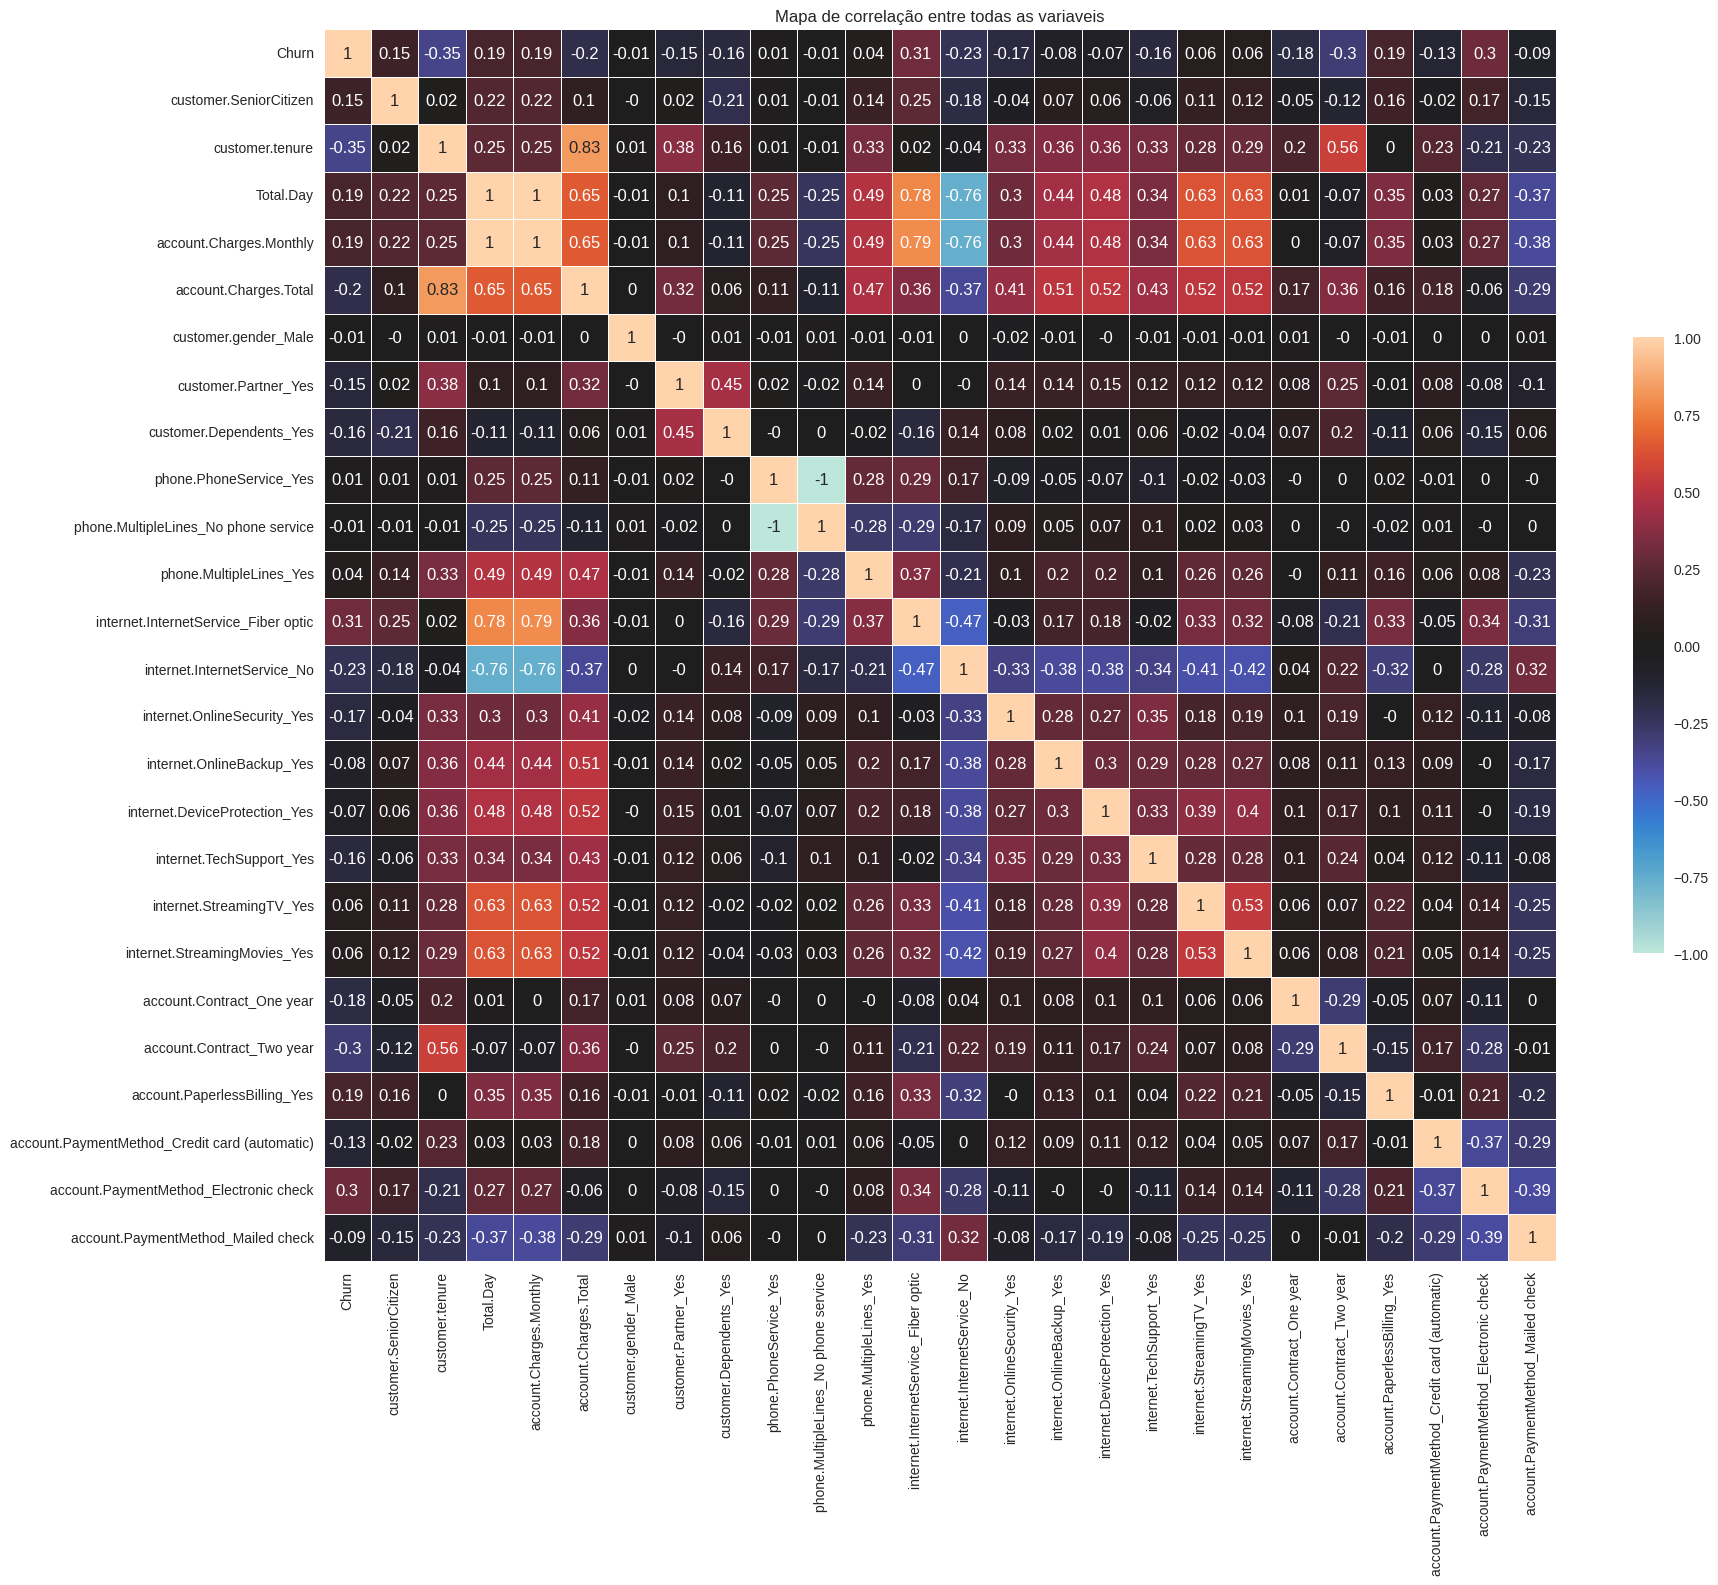

In [379]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
ax.set_title('Mapa de correlação entre todas as variaveis')
plt.show()

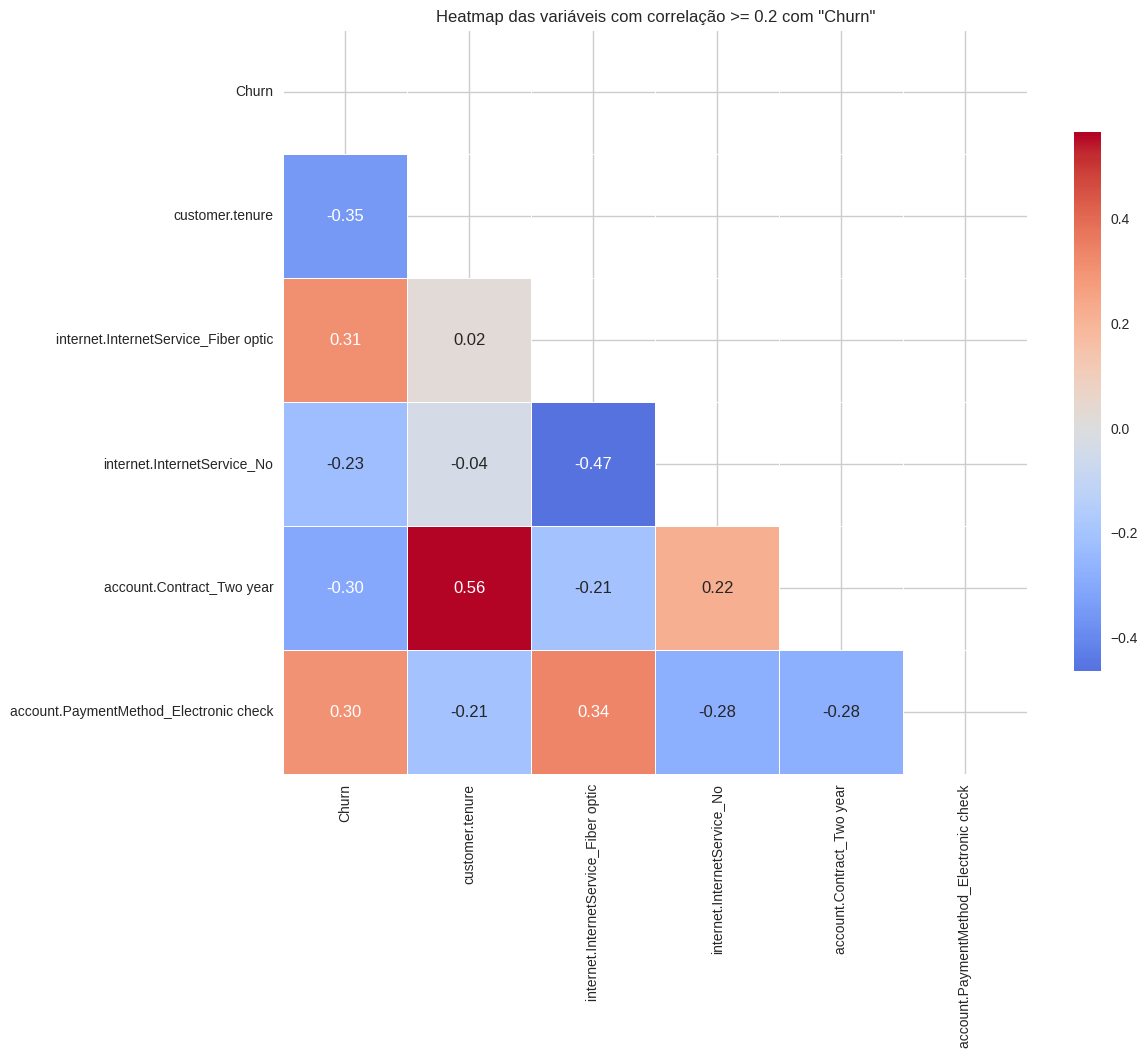

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns


# Definir a variável alvo
target_var = 'Churn'

# Definir o limiar mínimo de correlação absoluta para seleção
limiar = 0.2

# Filtrar variáveis que tenham correlação absoluta >= limiar com a variável alvo
# Isso cria uma lista com as variáveis relevantes
variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()

# Garantir que a variável alvo está na lista (se não estiver, adiciona)
if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)

# Criar uma matriz de correlação somente com as variáveis selecionadas
corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]

# Gerar uma máscara para esconder o triângulo superior da matriz (incluindo diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Plotar o heatmap com a máscara aplicada para melhor visualização
plt.figure(figsize=(12,10))
sns.heatmap( corr_filtrada,annot=True,fmt=".2f",
    cmap='coolwarm', center=0, square=True, linewidths=0.5,
    cbar_kws={"shrink": 0.7}, mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

In [381]:
px.box(df, y='account.Charges.Total', color='Churn')

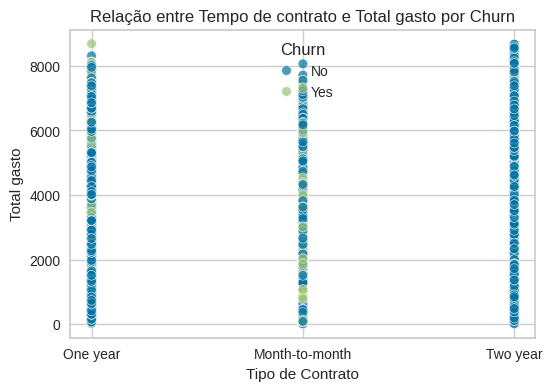

In [382]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='account.Contract', y='account.Charges.Total', hue='Churn', data=df, alpha=0.7)
plt.title('Relação entre Tempo de contrato e Total gasto por Churn')
plt.ylabel('Total gasto')
plt.xlabel('Tipo de Contrato')
plt.show()

In [383]:
X=df_codificado.drop('Churn', axis=1)
Y=df_codificado['Churn']


In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [385]:
X_const = add_constant(X).astype(float)

In [386]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


In [387]:
variaveis_a_remover = [
    "phone.MultipleLines_No phone service",
    "Total.Day",
    "internet.InternetService_No",
    "internet.StreamingMovies_Yes",
    "internet.StreamingTV_Yes",
    "account.Charges.Total"
]

# Remove as variáveis
X_filtrado = X.drop(columns=variaveis_a_remover, errors="ignore")

print("Variáveis removidas:", variaveis_a_remover)
print("Shape original:", X.shape)
print("Shape novo:", X_filtrado.shape)

Variáveis removidas: ['phone.MultipleLines_No phone service', 'Total.Day', 'internet.InternetService_No', 'internet.StreamingMovies_Yes', 'internet.StreamingTV_Yes', 'account.Charges.Total']
Shape original: (7032, 25)
Shape novo: (7032, 19)


In [388]:
X_filtrado.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_Yes,internet.InternetService_Fiber optic,internet.OnlineSecurity_Yes,internet.OnlineBackup_Yes,internet.DeviceProtection_Yes,internet.TechSupport_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,False,True,True,True,False,False,False,True,False,True,True,False,True,False,False,True
1,0,9,59.9,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True
2,0,4,73.9,True,False,False,True,False,True,False,False,True,False,False,False,True,False,True,False
3,1,13,98.0,True,True,False,True,False,True,False,True,True,False,False,False,True,False,True,False
4,1,3,83.9,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,True


# Modelagem preditiva

**Dividindo os dados em treino e teste**

Para analisar o desempenho do modelo, é necessário separar os dados em duas partes: uma destinada ao treino e outra à testagem. Desta forma, será possível verificar se o modelo aprendeu o suficiente, se apenas “decorou” a informação ou se não conseguiu identificar padrões nos dados.

In [389]:
X=X_filtrado
Y=df_codificado['Churn']
# Vamos separar as variaveis para o treino e teste do nosso modelo
X_test,X_train,Y_test,Y_train=train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=17)

In [390]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=17)
X_res, y_res = sm.fit_resample(X_train, Y_train)

In [391]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [392]:
arvore_balanciada = DecisionTreeClassifier(class_weight='balanced')
arvore_balanciada.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight='balanced')

In [393]:
Y_previsto = arvore_balanciada.predict(X_test)
accuracy_score(Y_test, Y_previsto)

0.7249777777777778

In [394]:
confusion_matrix(Y_test, Y_previsto)

array([[3233,  897],
       [ 650,  845]])

In [395]:
from re import M
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
X = X_treino
y = y_treino

# Inicializa o modelo
tree= DecisionTreeClassifier(max_depth=11 ,random_state=42)

# StratifiedKFold para manter a proporção
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Treina o modelo
    tree.fit(X_train, y_train)

    # Faz predição
    y_pred = tree.predict(X_val)

    # Avalia
    print(f"=== FOLD {fold} ===")
    print("Acurácia:", accuracy_score(y_val, y_pred))

    print(classification_report(y_val, y_pred))
    fold += 1
    if fold == 2:
      arvore = tree



=== FOLD 1 ===
Acurácia: 0.8006042296072508
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       167
           1       0.78      0.83      0.80       164

    accuracy                           0.80       331
   macro avg       0.80      0.80      0.80       331
weighted avg       0.80      0.80      0.80       331

=== FOLD 2 ===
Acurácia: 0.8277945619335347
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       167
           1       0.83      0.82      0.83       164

    accuracy                           0.83       331
   macro avg       0.83      0.83      0.83       331
weighted avg       0.83      0.83      0.83       331

=== FOLD 3 ===
Acurácia: 0.803030303030303
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       167
           1       0.80      0.81      0.80       163

    accuracy                           0.80       3

In [396]:
from sklearn.metrics import accuracy_score

y_pred_test = arvore.predict(X_test )
accuracy = accuracy_score(Y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {accuracy:.4f}")

print(classification_report(Y_test, y_pred_test))

Acurácia no conjunto de teste: 0.7164
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      4130
           1       0.47      0.56      0.51      1495

    accuracy                           0.72      5625
   macro avg       0.65      0.67      0.66      5625
weighted avg       0.73      0.72      0.72      5625



In [397]:
importancia = arvore.feature_importances_
pd.DataFrame(importancia, index=X.columns).sort_values(by=0, ascending=False)


,0
customer.tenure,0.264558
account.PaymentMethod_Electronic check,0.224216
account.Charges.Monthly,0.134736
account.PaperlessBilling_Yes,0.069108
internet.InternetService_Fiber optic,0.053392
customer.Partner_Yes,0.034643
account.PaymentMethod_Credit card (automatic),0.029694
phone.MultipleLines_Yes,0.027425
customer.gender_Male,0.026423
internet.OnlineSecurity_Yes,0.026372


In [398]:
features_remover = [
    "internet.OnlineBackup_Yes",
    "internet.TechSupport_Yes",
    "internet.DeviceProtection_Yes",
    "customer.Dependents_Yes",
    "customer.SeniorCitizen",
    "phone.PhoneService_Yes",
    "account.Contract_One year",
    "account.Contract_Two year"
]

X_reduzido = X.drop(columns=features_remover, errors="ignore")

print("Features removidas:",
      )
print("Shape original:", X.shape)
print("Shape novo:", X_reduzido.shape)


Features removidas:
Shape original: (1652, 19)
Shape novo: (1652, 11)


In [399]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
cv_resultados = cross_validate(lr, X_res, y_res, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
cv_resultados

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

{'fit_time': array([0.04078126, 0.04007578, 0.0416522 , 0.0400281 , 0.05516148]),
 'score_time': array([0.01545548, 0.01546979, 0.01759934, 0.0149951 , 0.01802087]),
 'test_accuracy': array([0.69082126, 0.71428571, 0.84503632, 0.82324455, 0.80871671]),
 'test_precision': array([0.75816993, 0.7431694 , 0.81497797, 0.78059072, 0.78995434]),
 'test_recall': array([0.56038647, 0.65700483, 0.89371981, 0.89805825, 0.83980583]),
 'test_f1': array([0.64444444, 0.6974359 , 0.85253456, 0.83521445, 0.81411765])}

**modelo knn*

Este modelo é sensivel a escala, por isso vamos efectuar a normalização desses dados neste caso vou usar o MinMaxScaler


In [400]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline

scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X_res), columns= X_res.columns)

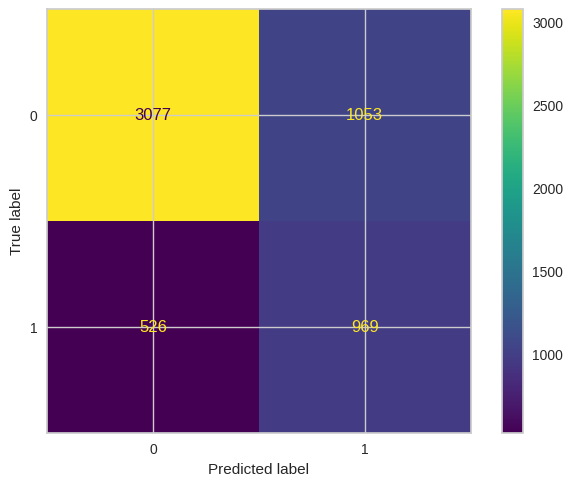

In [401]:

from sklearn.metrics import ConfusionMatrixDisplay
modelo_knn = KNeighborsClassifier(n_neighbors=5)
pipeline = Pipeline([('scaler', scaler), ('knn', modelo_knn)])
modelo_knn.fit(X_res, y_res)
y_pred_knn = modelo_knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_knn);


In [402]:
knn_pred = modelo_knn.predict(scaler.transform(X_test))
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      4130
           1       0.00      0.00      0.00      1495

    accuracy                           0.73      5625
   macro avg       0.37      0.50      0.42      5625
weighted avg       0.54      0.73      0.62      5625



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [403]:
importancia = pd.DataFrame(tree.feature_importances_, X.columns).sort_values(by=0, ascending=False)
importancia

,0
customer.tenure,0.264558
account.PaymentMethod_Electronic check,0.224216
account.Charges.Monthly,0.134736
account.PaperlessBilling_Yes,0.069108
internet.InternetService_Fiber optic,0.053392
customer.Partner_Yes,0.034643
account.PaymentMethod_Credit card (automatic),0.029694
phone.MultipleLines_Yes,0.027425
customer.gender_Male,0.026423
internet.OnlineSecurity_Yes,0.026372


In [404]:
from yellowbrick.model_selection import feature_importances

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



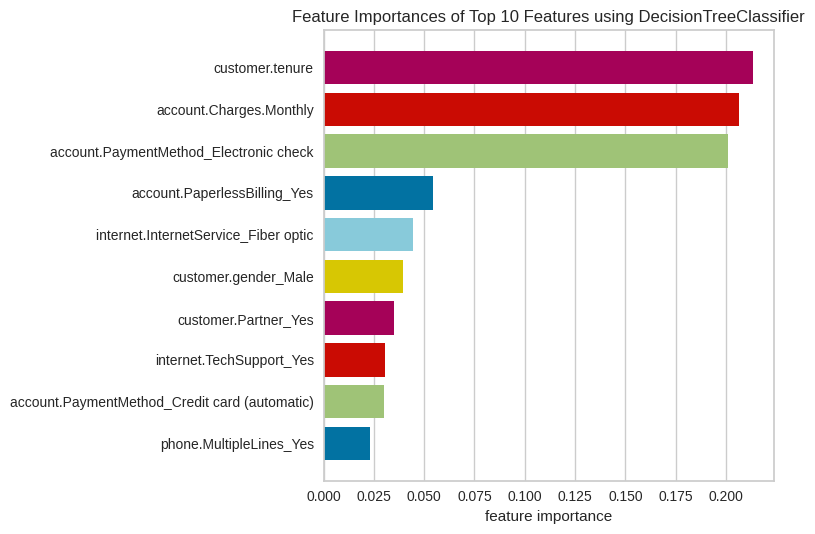

<Axes: title={'center': 'Feature Importances of Top 10 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [405]:
from yellowbrick.model_selection import FeatureImportances

# Initialize the visualizer
viz = FeatureImportances(arvore_balanciada, relative = False, topn=10)

# Fit the visualizer
viz.fit(X_res, y_res)

# Show the plot
viz.show()

In [406]:
col_pouco_relevantes =  importancia.tail(11).index
X_pra_treinar = X_norm.drop(columns=col_pouco_relevantes, axis=1)

In [407]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pra_treinar, y_res)

KNeighborsClassifier()

In [408]:
from sklearn.model_selection import cross_validate, KFold

In [409]:
modelo_arvore = DecisionTreeClassifier(max_depth=11 ,random_state=17)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_resultados = cross_validate(modelo_arvore, X_res, y_res, cv=kf, scoring=['accuracy', 'precision', 'recall', 'f1'])
cv_resultados

{'fit_time': array([0.01065898, 0.01020885, 0.01004291, 0.00996447, 0.00994015]),
 'score_time': array([0.0143919 , 0.01164436, 0.01168394, 0.01123929, 0.01096439]),
 'test_accuracy': array([0.79951691, 0.78450363, 0.79418886, 0.78934625, 0.77723971]),
 'test_precision': array([0.79245283, 0.77570093, 0.77981651, 0.76211454, 0.75909091]),
 'test_recall': array([0.8115942 , 0.80193237, 0.82125604, 0.83980583, 0.81067961]),
 'test_f1': array([0.80190931, 0.78859857, 0.8       , 0.79907621, 0.78403756])}

In [410]:
def intervalo_conf(cv_resultados, metricas):
  media = cv_resultados[f'test_{metricas}'].mean()
  desvio_padrao = cv_resultados[f'test_{metricas}'].std()
  print(f'intervalo de confiança => [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [411]:
intervalo_conf(cv_resultados, 'recall')

intervalo de confiança => [0.7912170664515097, 0.8428901517840328]


In [412]:
modelo_arvore.fit(X_res, y_res)


DecisionTreeClassifier(max_depth=11, random_state=17)

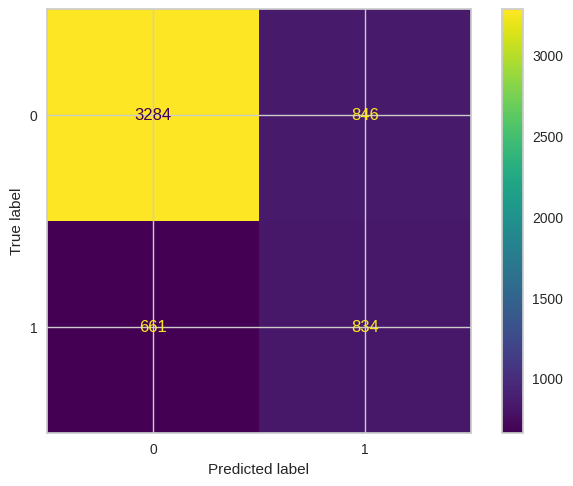

In [413]:
from sklearn.metrics import ConfusionMatrixDisplay
y_previsto = modelo_arvore.predict(X_test)
ConfusionMatrixDisplay.from_predictions(Y_test, y_previsto);

In [414]:
modelo_arvore.score(X_test, Y_test)

0.7320888888888889

In [415]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(X_res, y_res)

In [416]:
modlo = KNeighborsClassifier(n_neighbors=5)
modlo.fit(x_balanceado, y_balanceado)
y_p = modlo.predict(X_test)
confusion_matrix(Y_test, y_p)
print(classification_report(Y_test, y_p))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80      4130
           1       0.48      0.65      0.55      1495

    accuracy                           0.72      5625
   macro avg       0.67      0.70      0.67      5625
weighted avg       0.75      0.72      0.73      5625



In [417]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000) # Increased max_iter as a precaution
cv_resultados = cross_validate(lr, X_res_scaled, y_res, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
cv_resultados

{'fit_time': array([0.00780463, 0.00761652, 0.00746441, 0.00763774, 0.00815439]),
 'score_time': array([0.01302075, 0.01262856, 0.01217365, 0.01276469, 0.01302385]),
 'test_accuracy': array([0.70289855, 0.71428571, 0.84261501, 0.81598063, 0.81840194]),
 'test_precision': array([0.77272727, 0.7431694 , 0.81415929, 0.77542373, 0.80184332]),
 'test_recall': array([0.57487923, 0.65700483, 0.88888889, 0.88834951, 0.84466019]),
 'test_f1': array([0.65927978, 0.6974359 , 0.84988453, 0.8280543 , 0.82269504])}

** comparando os modelos

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4130
           1       0.54      0.66      0.59      1495

    accuracy                           0.76      5625
   macro avg       0.70      0.73      0.71      5625
weighted avg       0.78      0.76      0.77      5625

0.7598222222222222


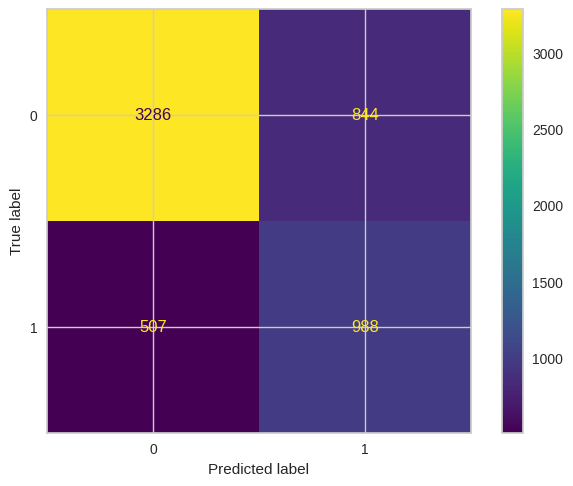

In [418]:
lr.fit(X_res_scaled, y_res)
y_pred_lr = lr.predict(scaler.transform(X_test))
print(classification_report(Y_test, y_pred_lr))
print(accuracy_score(Y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_lr);

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      4130
           1       0.54      0.66      0.59      1495

    accuracy                           0.76      5625
   macro avg       0.70      0.73      0.71      5625
weighted avg       0.78      0.76      0.77      5625

0.7125333333333334


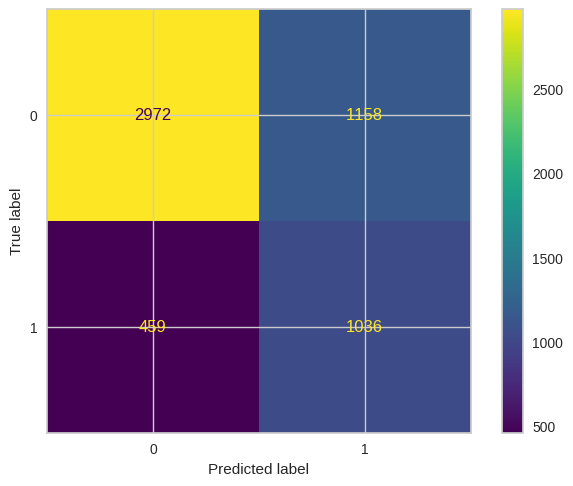

In [419]:
modelo_knn.fit(X_res_scaled, y_res)
y_pred_knn= modelo_knn.predict(scaler.transform(X_test))
print(classification_report(Y_test, y_pred_lr))
print(accuracy_score(Y_test, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_knn);

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      4130
           1       0.50      0.56      0.53      1495

    accuracy                           0.73      5625
   macro avg       0.66      0.68      0.67      5625
weighted avg       0.74      0.73      0.74      5625



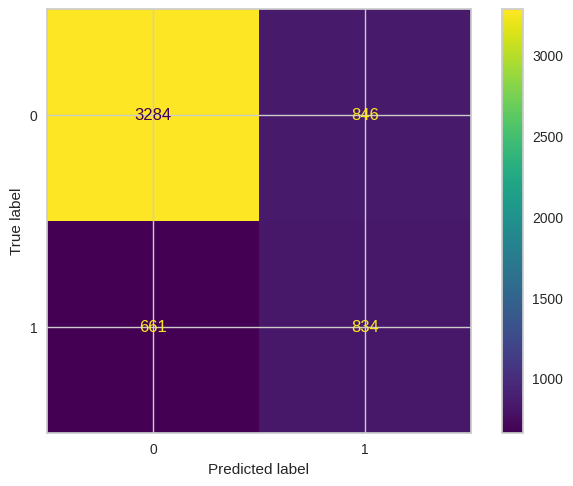

In [420]:
modelo_arvore.fit(X_res, y_res)
y_pred_arvore = modelo_arvore.predict(X_test)
print(classification_report(Y_test, y_pred_arvore))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_arvore);

O melhor modelo neste caso é o knn, uma vez que apresenta o maior recall para a classe dos clientes que evadem (churn = 1). Isto significa que o modelo consegue identificar a maior quantidade de clientes que efetivamente irão sair, mesmo que cometa mais erros na classificação dos clientes que permanecem (classe 0).

Podemos concordar que neste caso mais vale errar que o cliente fiel sairá do que perder um cliente.



In [421]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, recall_score

# criar scorer para recall
recall_scorer = make_scorer(recall_score)

# calcular importâncias
result = permutation_importance(modelo_knn, scaler.transform(X_test), Y_test, scoring=recall_scorer, n_repeats=10, random_state=42)

# ordenar features por importância
for i in result.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {result.importances_mean[i]:.4f}")


customer.tenure: 0.0923
internet.InternetService_Fiber optic: 0.0546
account.Contract_Two year: 0.0341
account.Contract_One year: 0.0329
account.PaperlessBilling_Yes: 0.0308
account.PaymentMethod_Electronic check: 0.0183
phone.PhoneService_Yes: 0.0155
phone.MultipleLines_Yes: 0.0149
account.PaymentMethod_Mailed check: 0.0136
customer.Dependents_Yes: 0.0107
customer.gender_Male: 0.0078
account.Charges.Monthly: 0.0058
internet.OnlineSecurity_Yes: 0.0050
customer.Partner_Yes: 0.0037
internet.TechSupport_Yes: 0.0034
customer.SeniorCitizen: 0.0013
internet.OnlineBackup_Yes: 0.0001
internet.DeviceProtection_Yes: -0.0021
account.PaymentMethod_Credit card (automatic): -0.0027


In [422]:
import numpy as np

threshold = 0.001  # define o corte mínimo
important_features = X.columns[result.importances_mean >= threshold]

print("Features selecionadas:")
print(list(important_features))


Features selecionadas:
['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.OnlineSecurity_Yes', 'internet.TechSupport_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check']


podemos remover as colunas que menos contribuem para o modelo

```
# ['internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes', 'account.PaymentMethod_Credit card (automatic)']
```



In [423]:
X_res_scaled = pd.DataFrame(X_res_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [424]:
X_train_reduced = X_res_scaled[important_features]
X_test_reduced = X_test_scaled[important_features]

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      4130
           1       0.46      0.68      0.55      1495

    accuracy                           0.70      5625
   macro avg       0.66      0.69      0.66      5625
weighted avg       0.75      0.70      0.72      5625



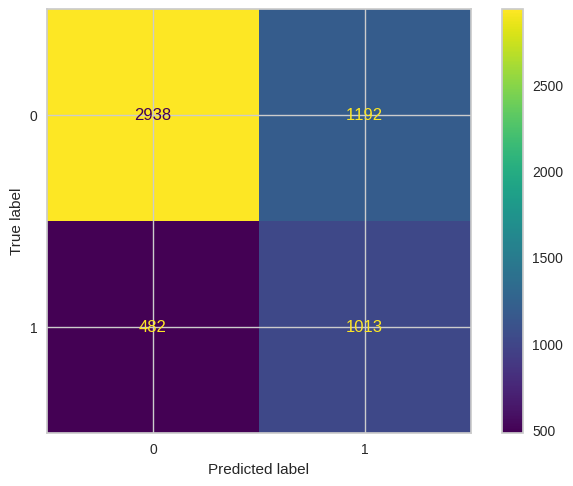

In [425]:
modelo_knn.fit(X_train_reduced, y_res)
y_pred_knn_reduced = modelo_knn.predict(X_test_reduced)
print(classification_report(Y_test, y_pred_knn_reduced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_knn_reduced);

In [426]:
resultados = []
for i in range(1, 80):
  modelo_knn = KNeighborsClassifier(n_neighbors=i)
  modelo_knn.fit(X_train_reduced, y_res)
  y_pred_knn_reduced = modelo_knn.predict(X_test_reduced)
  score = recall_score(Y_test, y_pred_knn_reduced)
  resultados.append(score)

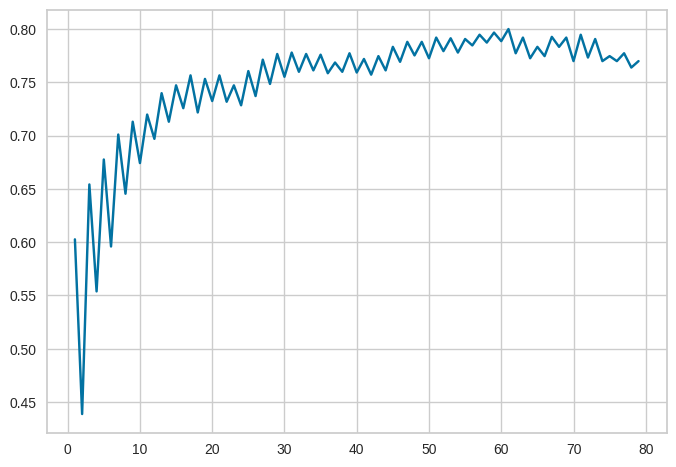

In [427]:
plt.plot(range(1,80), resultados)
plt.show()

In [428]:
modelo_knn = KNeighborsClassifier(n_neighbors=61)
modelo_knn.fit(X_train_reduced, y_res)
y_pred_knn_reduced = modelo_knn.predict(X_test_reduced)
recall_score(Y_test, y_pred_knn_reduced)

0.8

In [429]:
print(classification_report(Y_test, y_pred_knn_reduced))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      4130
           1       0.48      0.80      0.60      1495

    accuracy                           0.72      5625
   macro avg       0.69      0.75      0.69      5625
weighted avg       0.79      0.72      0.74      5625



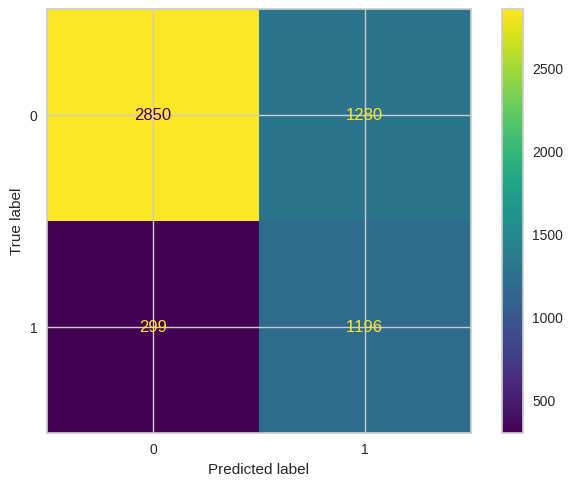

In [431]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_knn_reduced)

In [432]:
import pickle
with open('modelo_knn_final.pkl', 'wb') as file:
    pickle.dump(modelo_knn, file)